In [ ]:
import liana as li
import scanpy as sc

In [ ]:
adata = sc.read_h5ad("/home/julia/Placodes_Alia/placodes_NC_NP_Annotation.h5ad")

/home/julia/miniconda3/envs/liana_env/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


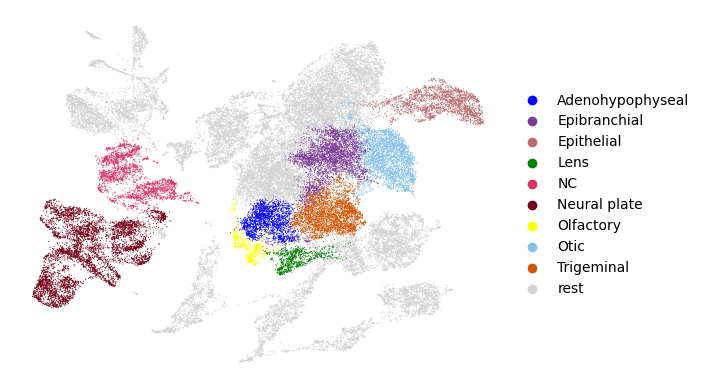

In [ ]:
sc.pl.umap(adata, color='annotation', title='', frameon=False)

In [ ]:
adata.obs['annotation'].unique()

['rest', 'Neural plate', 'Epibranchial', 'Epithelial', 'Trigeminal', 'NC', 'Otic', 'Adenohypophyseal', 'Olfactory', 'Lens']
Categories (10, object): ['Adenohypophyseal', 'Epibranchial', 'Epithelial', 'Lens', ..., 'Olfactory', 'Otic', 'Trigeminal', 'rest']

In [ ]:
# Define placodal clusters (adjust to your dataset!)
placodal_clusters = [ 'Neural plate', 'Epibranchial', 'Epithelial', 'Trigeminal', 'NC', 'Otic', 'Adenohypophyseal', 'Olfactory', 'Lens']
# Subset adata
adata_placodal = adata[adata.obs["annotation"].isin(placodal_clusters)].copy()

print(f"Original cells: {adata.n_obs}")
print(f"Placodal cells: {adata_placodal.n_obs}")

Original cells: 55025
Placodal cells: 24925


/home/julia/miniconda3/envs/liana_env/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [ ]:
# Compute average expression per placodal cluster
avg_exp_placodal = adata_placodal.to_df().groupby(adata_placodal.obs["annotation"]).mean().T

/tmp/ipykernel_3202872/344987695.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [ ]:
avg_exp_placodal

annotation,Adenohypophyseal,Epibranchial,Epithelial,Lens,NC,Neural plate,Olfactory,Otic,Trigeminal
0610005C13Rik,0.003047,0.004410,0.004354,0.006535,0.006524,0.007092,0.004358,0.002017,0.006525
0610006L08Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610009B22Rik,0.309927,0.295997,0.278406,0.394463,0.246851,0.227608,0.319277,0.289479,0.281695
0610009E02Rik,0.012601,0.017776,0.013036,0.032908,0.024195,0.047713,0.016320,0.017579,0.013896
0610009L18Rik,0.010408,0.010296,0.016559,0.020214,0.016024,0.024938,0.022362,0.006439,0.014061
...,...,...,...,...,...,...,...,...,...
mt-Nd3,0.747673,0.746682,0.577058,1.039696,0.910602,1.298962,0.983231,0.717508,0.735346
mt-Nd4,2.203717,2.147274,2.452449,2.630676,2.317109,2.473433,2.665566,2.228763,2.301021
mt-Nd4l,0.460345,0.433000,0.474048,0.387414,0.529850,0.759970,0.495701,0.464354,0.499651
mt-Nd5,1.221794,1.178418,1.275689,1.315242,1.295459,1.482227,1.402670,1.229506,1.287928


In [ ]:
adata_ep=adata_placodal.copy()

/home/julia/miniconda3/envs/liana_env/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [ ]:
genes=adata_ep.var_names

In [ ]:
adata_ep.var_names = adata_ep.var_names.str.upper()

In [ ]:
print(adata_ep.var_names[:20])

Index(['0610005C13RIK', '0610006L08RIK', '0610009B22RIK', '0610009E02RIK',
       '0610009L18RIK', '0610010F05RIK', '0610010K14RIK', '0610012D04RIK',
       '0610012G03RIK', '0610025J13RIK', '0610030E20RIK', '0610031O16RIK',
       '0610033M10RIK', '0610038B21RIK', '0610039K10RIK', '0610040B10RIK',
       '0610040F04RIK', '0610040J01RIK', '0610043K17RIK', '0710001A04RIK'],
      dtype='object')


In [ ]:
adata_ep.obs_names_make_unique()

In [ ]:
# import all individual methods
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

In [ ]:
# run cellphonedb
cellphonedb(adata_ep,
            groupby='annotation',
            # NOTE by default the resource uses HUMAN gene symbols
            resource_name='consensus',
            expr_prop=0.35,
            verbose=True,use_raw=False,
            key_added='cpdb_res')

Using `.X`!
1223 features of mat are empty, they will be removed.


/home/julia/miniconda3/envs/liana_env/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:82: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/home/julia/miniconda3/envs/liana_env/lib/python3.13/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/julia/miniconda3/envs/liana_env/lib/python3.13/site-packages/liana/method/_pipe_utils/_pre.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


0.18 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 24925 samples and 24642 features


100%|██████████| 1000/1000 [00:38<00:00, 25.85it/s]


In [ ]:
adata_ep.uns['cpdb_res']

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
4554,MDK,MDK,2.917406,0.996648,NCL,NCL,3.285002,0.999198,Lens,NC,3.101204,0.0
9024,MDK,MDK,2.917406,0.996648,NCL,NCL,3.208267,0.999176,Lens,Otic,3.062837,0.0
325,MDK,MDK,2.917406,0.996648,NCL,NCL,3.177745,0.996495,Lens,Adenohypophyseal,3.047575,0.0
6141,MDK,MDK,2.917406,0.996648,NCL,NCL,3.159793,0.999825,Lens,Neural plate,3.038599,0.0
5118,MDK,MDK,2.695910,0.998325,NCL,NCL,3.285002,0.999198,Olfactory,NC,2.990456,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8141,PTDSS1,PTDSS1,0.157703,0.392651,SCARB1,SCARB1,0.189881,0.368509,Neural plate,Olfactory,0.173792,0.0
8123,SERPINE2,SERPINE2,0.153803,0.351006,LRP1,LRP1,0.192385,0.365159,Neural plate,Olfactory,0.173094,1.0
6364,JAM2,JAM2,0.185580,0.390026,ITGAV,ITGAV_ITGB1,0.159177,0.358880,Neural plate,Neural plate,0.172378,0.0
6388,NLGN2,NLGN2,0.152952,0.367279,NRXN2,NRXN2,0.157196,0.371654,Neural plate,Neural plate,0.155074,0.0


In [ ]:
res = adata_ep.uns['cpdb_res']
#res.head()


In [ ]:
res.head()

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
4554,MDK,MDK,2.917406,0.996648,NCL,NCL,3.285002,0.999198,Lens,NC,3.101204,0.0
9024,MDK,MDK,2.917406,0.996648,NCL,NCL,3.208267,0.999176,Lens,Otic,3.062837,0.0
325,MDK,MDK,2.917406,0.996648,NCL,NCL,3.177745,0.996495,Lens,Adenohypophyseal,3.047575,0.0
6141,MDK,MDK,2.917406,0.996648,NCL,NCL,3.159793,0.999825,Lens,Neural plate,3.038599,0.0
5118,MDK,MDK,2.695910,0.998325,NCL,NCL,3.285002,0.999198,Olfactory,NC,2.990456,0.0


In [ ]:
sig_res = res[res['cellphone_pvals'] < 0.01]
sig_res.head()

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
4554,MDK,MDK,2.917406,0.996648,NCL,NCL,3.285002,0.999198,Lens,NC,3.101204,0.0
9024,MDK,MDK,2.917406,0.996648,NCL,NCL,3.208267,0.999176,Lens,Otic,3.062837,0.0
325,MDK,MDK,2.917406,0.996648,NCL,NCL,3.177745,0.996495,Lens,Adenohypophyseal,3.047575,0.0
6141,MDK,MDK,2.917406,0.996648,NCL,NCL,3.159793,0.999825,Lens,Neural plate,3.038599,0.0
5118,MDK,MDK,2.695910,0.998325,NCL,NCL,3.285002,0.999198,Olfactory,NC,2.990456,0.0


In [ ]:
# Extract results
res = adata_ep.uns['cpdb_res']

# Subset significant interactions (p ≤ 0.01)
res_sig = res[res['cellphone_pvals'] <= 0.01]

# Check first rows
res_sig.head()


,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
4554,MDK,MDK,2.917406,0.996648,NCL,NCL,3.285002,0.999198,Lens,NC,3.101204,0.0
9024,MDK,MDK,2.917406,0.996648,NCL,NCL,3.208267,0.999176,Lens,Otic,3.062837,0.0
325,MDK,MDK,2.917406,0.996648,NCL,NCL,3.177745,0.996495,Lens,Adenohypophyseal,3.047575,0.0
6141,MDK,MDK,2.917406,0.996648,NCL,NCL,3.159793,0.999825,Lens,Neural plate,3.038599,0.0
5118,MDK,MDK,2.695910,0.998325,NCL,NCL,3.285002,0.999198,Olfactory,NC,2.990456,0.0


In [ ]:
res_sig.head()

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
4554,MDK,MDK,2.917406,0.996648,NCL,NCL,3.285002,0.999198,Lens,NC,3.101204,0.0
9024,MDK,MDK,2.917406,0.996648,NCL,NCL,3.208267,0.999176,Lens,Otic,3.062837,0.0
325,MDK,MDK,2.917406,0.996648,NCL,NCL,3.177745,0.996495,Lens,Adenohypophyseal,3.047575,0.0
6141,MDK,MDK,2.917406,0.996648,NCL,NCL,3.159793,0.999825,Lens,Neural plate,3.038599,0.0
5118,MDK,MDK,2.695910,0.998325,NCL,NCL,3.285002,0.999198,Olfactory,NC,2.990456,0.0


In [ ]:
res_sig.to_csv("Ligands_receptors_Placodes_NC_NP_full_1.csv", index=False)

In [ ]:
edge_counts = (
    res_sig.groupby(['source', 'target'])
    .size()
    .reset_index(name='count')
)


In [ ]:
edge_counts

,source,target,count
0,Adenohypophyseal,Adenohypophyseal,16
1,Adenohypophyseal,Epibranchial,14
2,Adenohypophyseal,Epithelial,45
3,Adenohypophyseal,Lens,57
4,Adenohypophyseal,NC,42
...,...,...,...
76,Trigeminal,NC,107
77,Trigeminal,Neural plate,139
78,Trigeminal,Olfactory,119
79,Trigeminal,Otic,58


/tmp/ipykernel_3202872/1123183815.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


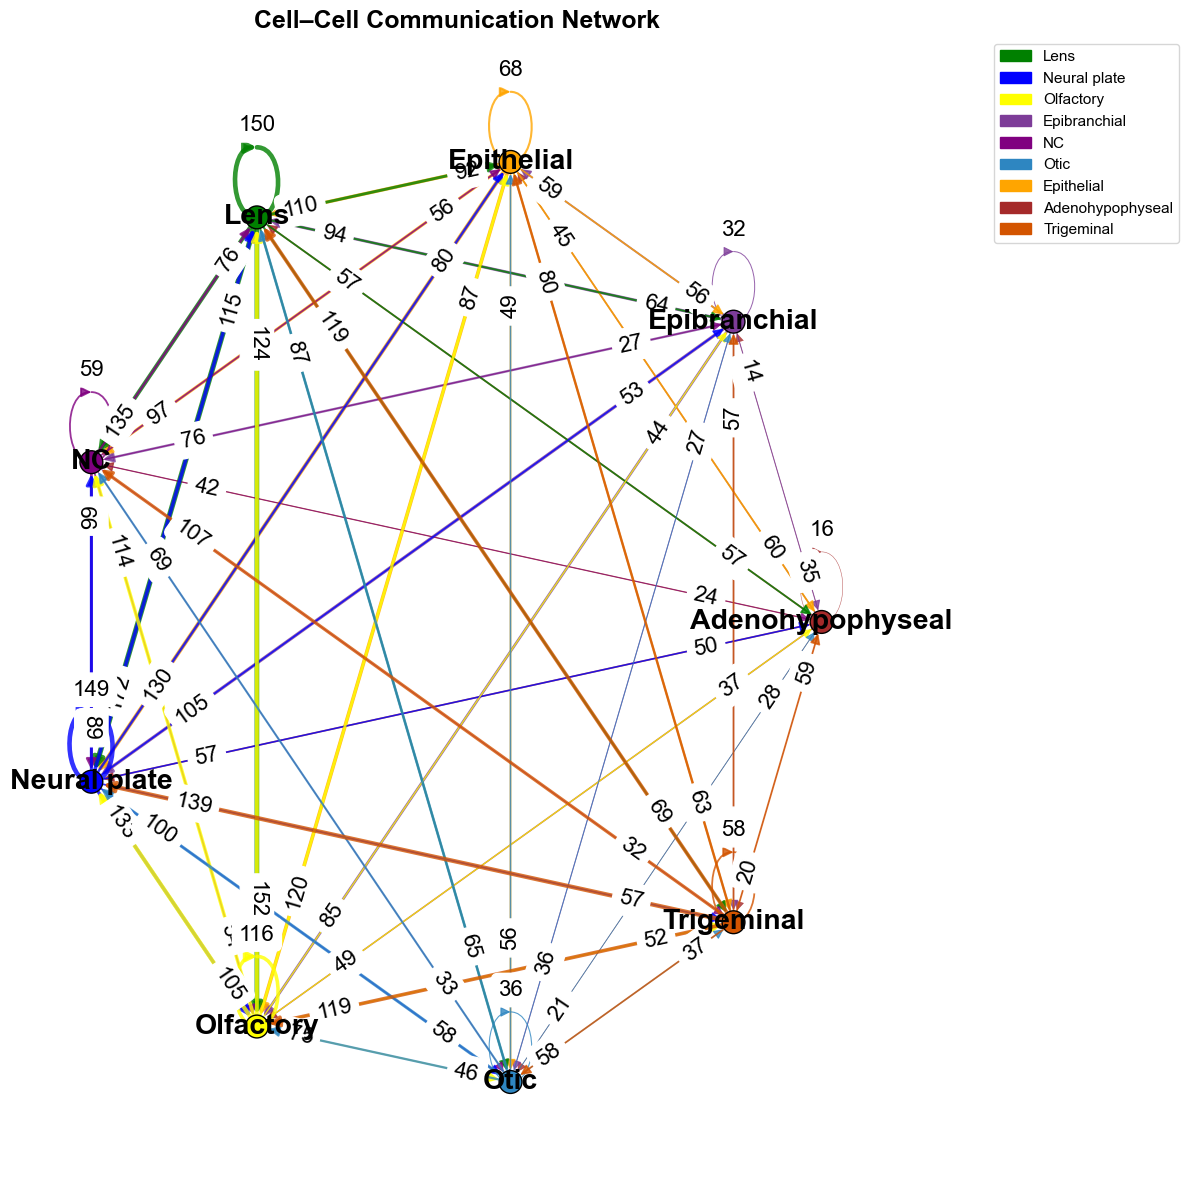

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

plt.rcParams["font.family"] = "Arial"  # use Arial globally

# ============================================
# 1. Build graph from edge_counts DataFrame
# ============================================
G = nx.DiGraph()
for _, row in edge_counts.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['count'])

# Keep self-loops (Lens→Lens etc.)
# If you don’t want them, uncomment:
# G.remove_edges_from(nx.selfloop_edges(G))

# ============================================
# 2. Layout (circle, like CellChat)
# ============================================
pos = nx.circular_layout(G)

# ============================================
# 3. Node colors (customizable)
# ============================================
color_map = {
   "Lens": "green",
   "Neural plate": "blue",
   "Olfactory": "yellow",
   "Epibranchial": "#7d3c98",
   "NC": "purple",
   "Otic": "#2e86c1",
   "Epithelial": "orange",
   "Adenohypophyseal": "brown",
   "Trigeminal": "#d35400"
}

# For nodes not in dictionary, fall back to a colormap
cmap = cm.get_cmap("tab10", len(edge_counts['source'].unique()))
for i, node in enumerate(G.nodes()):
    if node not in color_map:
        color_map[node] = cmap(i)

# ============================================
# 4. Node sizes (scaled by outgoing interactions)
# ============================================
out_degree = dict(G.out_degree(weight="count"))
sizes = [out_degree[node]*30 for node in G.nodes()]  # scale factor

# ============================================
# 5. Draw nodes
# ============================================
plt.figure(figsize=(12,12))
nx.draw_networkx_nodes(
    G, pos,
    node_size=sizes,
    node_color=[color_map[n] for n in G.nodes()],
    edgecolors="black"
)

# ============================================
# 6. Draw edges (thinner, colored by source)
# ============================================
for u, v, d in G.edges(data=True):
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u,v)],
        width=d['weight']/45,   # thinner lines
        edge_color=[color_map[u]],
        alpha=0.8,
        arrows=True,
        arrowsize=15
    )

# ============================================
# 7. Draw node labels (scaled by importance)
# ============================================
for node, (x, y) in pos.items():
    label_size = 16 + out_degree[node]/2   # scale with interactions
    plt.text(x, y, node,
             fontsize=label_size,
             fontweight="bold",
             ha="center", va="center")

# ============================================
# 8. Draw edge labels (interaction counts, bigger font)
# ============================================
edge_labels = {(u,v): d['weight'] for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=16,    # larger numbers
    label_pos=0.85,
    font_family="Arial"
)

# ============================================
# 9. Legend
# ============================================
handles = [mpatches.Patch(color=color_map[src], label=src) for src in color_map]
plt.legend(handles=handles, bbox_to_anchor=(1.1, 1), loc="upper left", prop={"family": "Arial", "size": 11})

# ============================================
# 10. Finalize & save
# ============================================
plt.title("Cell–Cell Communication Network", fontsize=18, fontweight="bold")
plt.axis("off")
plt.tight_layout()

plt.savefig("Placodes_NC_NP_epi_12.svg", dpi=300, bbox_inches="tight")  # vector
#plt.savefig("cell_network_circle.pdf", dpi=300, bbox_inches="tight")  # vector
plt.show()


/tmp/ipykernel_3202872/298597944.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



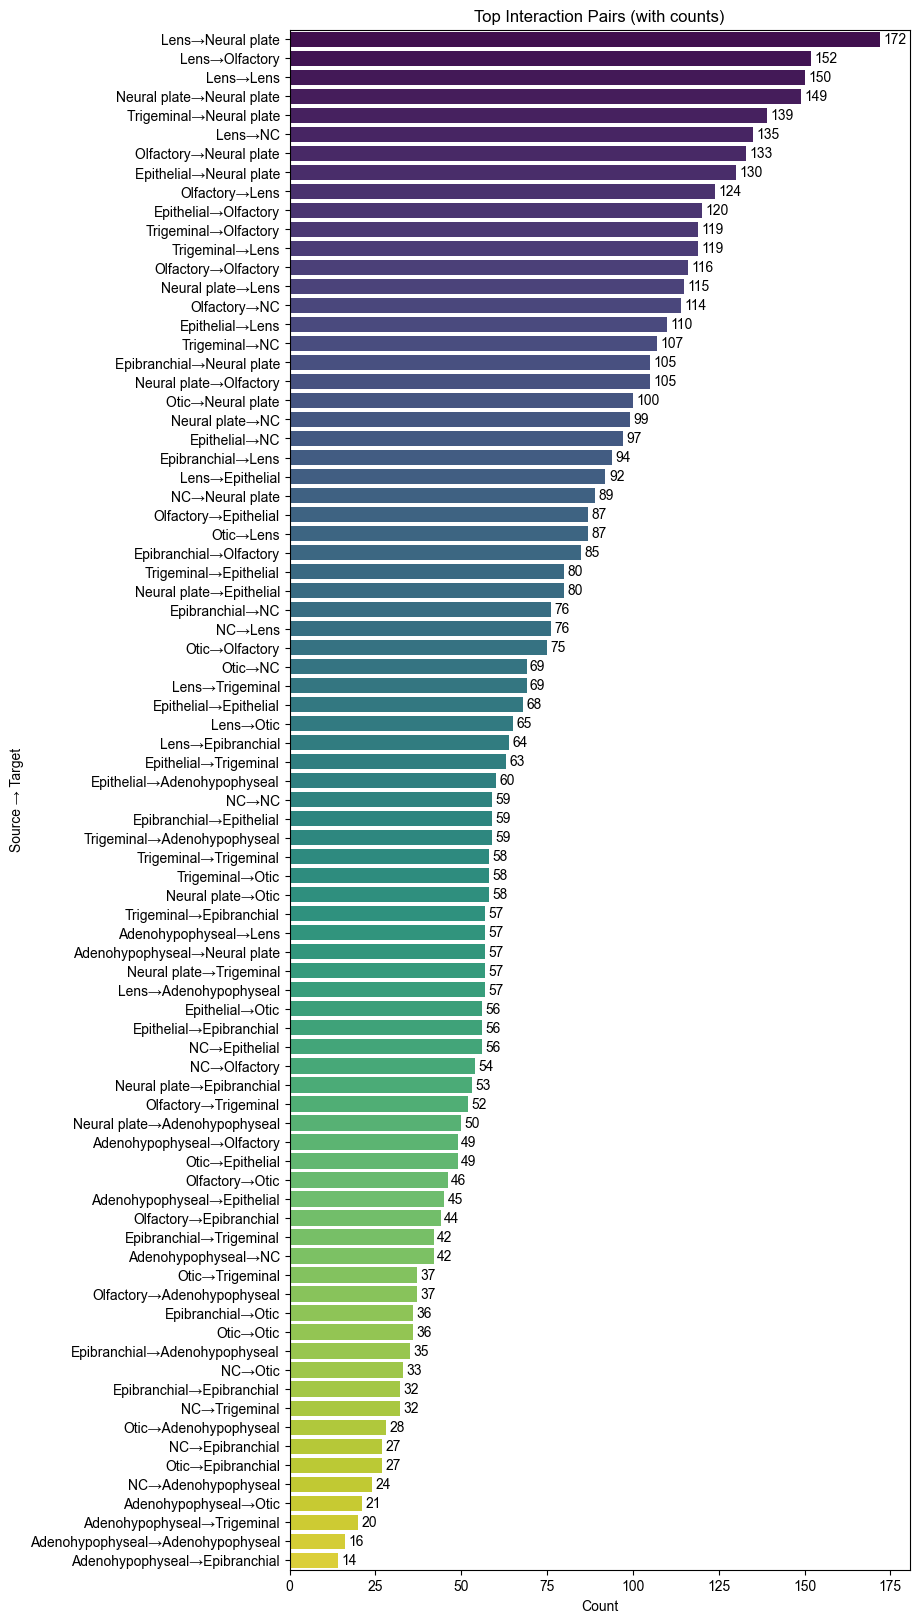

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort top edges
top_edges = edge_counts.sort_values("count", ascending=False)

plt.figure(figsize=(8, 20))
ax = sns.barplot(
    data=top_edges,
    x="count",
    y=top_edges["source"] + "→" + top_edges["target"],
    palette="viridis"
)

# Add text labels with counts next to bars
for i, (value) in enumerate(top_edges["count"]):
    ax.text(value + 1, i, str(value), va='center')

plt.xlabel("Count")
plt.ylabel("Source → Target")
plt.title("Top Interaction Pairs (with counts)")
# Save as PDF (high resolution, tight layout)
plt.savefig("top_interactions.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()


In [ ]:
res_sig[
    (res_sig['source'] == 'Adenohypophyseal') &
    (res_sig['target'] == 'Adenohypophyseal')
]


,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
49,MDK,MDK,2.493553,0.995493,NCL,NCL,3.177745,0.996495,Adenohypophyseal,Adenohypophyseal,2.835649,0.000
41,CALM1,CALM1,2.339074,0.988483,MYLK,MYLK,0.573842,0.541813,Adenohypophyseal,Adenohypophyseal,1.456458,0.000
36,GPC3,GPC3,1.882557,0.950426,IGF1R,IGF1R,1.028349,0.791688,Adenohypophyseal,Adenohypophyseal,1.455453,0.001
22,MDK,MDK,2.493553,0.995493,ITGA6,ITGA6_ITGB1,0.389805,0.416124,Adenohypophyseal,Adenohypophyseal,1.441679,0.009
44,CALM1,CALM1,2.339074,0.988483,HMMR,HMMR,0.455967,0.467201,Adenohypophyseal,Adenohypophyseal,1.397520,0.000
42,CALM2,CALM2,2.211687,0.984977,MYLK,MYLK,0.573842,0.541813,Adenohypophyseal,Adenohypophyseal,1.392765,0.000
38,BSG,BSG,1.982563,0.976965,SLC16A1,SLC16A1,0.613764,0.597396,Adenohypophyseal,Adenohypophyseal,1.298163,0.000
34,GPC3,GPC3,1.882557,0.950426,CD81,CD81,0.693988,0.655483,Adenohypophyseal,Adenohypophyseal,1.288273,0.000
9,EFNA5,EFNA5,1.951381,0.960441,EPHB1,EPHB1,0.458329,0.465198,Adenohypophyseal,Adenohypophyseal,1.204855,0.000
46,GPC3,GPC3,1.882557,0.950426,LRP2,LRP2,0.402730,0.428142,Adenohypophyseal,Adenohypophyseal,1.142644,0.000


In [ ]:
res_sig[
    (res_sig['source'] == 'Adenohypophyseal') &
    (res_sig['target'] == 'Adenohypophyseal')
][['ligand', 'receptor', 'source'	,'target']]


,ligand,receptor,source,target
49,MDK,NCL,Adenohypophyseal,Adenohypophyseal
41,CALM1,MYLK,Adenohypophyseal,Adenohypophyseal
36,GPC3,IGF1R,Adenohypophyseal,Adenohypophyseal
22,MDK,ITGA6,Adenohypophyseal,Adenohypophyseal
44,CALM1,HMMR,Adenohypophyseal,Adenohypophyseal
42,CALM2,MYLK,Adenohypophyseal,Adenohypophyseal
38,BSG,SLC16A1,Adenohypophyseal,Adenohypophyseal
34,GPC3,CD81,Adenohypophyseal,Adenohypophyseal
9,EFNA5,EPHB1,Adenohypophyseal,Adenohypophyseal
46,GPC3,LRP2,Adenohypophyseal,Adenohypophyseal


In [ ]:
pairs = dict(tuple(res_sig.groupby(['source', 'target'])))
# ключ = (source, target), значение = подтаблица (все строки для этой пары)

pairs[('Adenohypophyseal', 'Lens')].head()


,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
2436,HMGB1,HMGB1,3.242866,0.999499,SDC1,SDC1,0.315637,0.473743,Adenohypophyseal,Lens,1.779252,0.0
2441,GPC3,GPC3,1.882557,0.950426,IGF1R,IGF1R,1.358939,0.951955,Adenohypophyseal,Lens,1.620748,0.0
2450,CALM1,CALM1,2.339074,0.988483,MYLK,MYLK,0.685259,0.735196,Adenohypophyseal,Lens,1.512166,0.0
2444,MDK,MDK,2.493553,0.995493,SDC4,SDC4,0.458042,0.583240,Adenohypophyseal,Lens,1.475797,0.0
2439,GPC3,GPC3,1.882557,0.950426,CD81,CD81,1.034650,0.900559,Adenohypophyseal,Lens,1.458603,0.0


In [ ]:
pairs

{('Adenohypophyseal',
  'Adenohypophyseal'):      ligand ligand_complex  ligand_means  ligand_props receptor  \
 49      MDK            MDK      2.493553      0.995493      NCL   
 41    CALM1          CALM1      2.339074      0.988483     MYLK   
 36     GPC3           GPC3      1.882557      0.950426    IGF1R   
 22      MDK            MDK      2.493553      0.995493    ITGA6   
 44    CALM1          CALM1      2.339074      0.988483     HMMR   
 42    CALM2          CALM2      2.211687      0.984977     MYLK   
 38      BSG            BSG      1.982563      0.976965  SLC16A1   
 34     GPC3           GPC3      1.882557      0.950426     CD81   
 9     EFNA5          EFNA5      1.951381      0.960441    EPHB1   
 46     GPC3           GPC3      1.882557      0.950426     LRP2   
 27   SEMA3A         SEMA3A      1.620274      0.884827     NRP2   
 5      CDH1           CDH1      0.496662      0.512769    PTPRF   
 7      CDH1           CDH1      0.496662      0.512769    PTPRM   
 43 

In [ ]:
wide = (res_sig
        .assign(lr = res_sig['ligand'] + '-' + res_sig['receptor'])
        .groupby(['source','target'])['lr']
        .apply(lambda x: '; '.join(x))
        .reset_index(name='lr_list')
       )

wide.head()


,source,target,lr_list
0,Adenohypophyseal,Adenohypophyseal,MDK-NCL; CALM1-MYLK; GPC3-IGF1R; MDK-ITGA6; CA...
1,Adenohypophyseal,Epibranchial,MDK-NCL; GPC3-IGF1R; MDK-SDC4; CALM1-MYLK; DNA...
2,Adenohypophyseal,Epithelial,HSPA8-LRP2; MDK-LRP2; CALM1-PTPRA; GPC3-UNC5C;...
3,Adenohypophyseal,Lens,HMGB1-SDC1; GPC3-IGF1R; CALM1-MYLK; MDK-SDC4; ...
4,Adenohypophyseal,NC,MDK-NCL; HMGB1-SDC1; GPC3-IGF1R; MDK-LRP1; MDK...


In [ ]:
wide

,source,target,lr_list
0,Adenohypophyseal,Adenohypophyseal,"[MDK-NCL, CALM1-MYLK, GPC3-IGF1R, MDK-ITGA6..."
1,Adenohypophyseal,Epibranchial,"[MDK-NCL, GPC3-IGF1R, MDK-SDC4, CALM1-MYLK,..."
2,Adenohypophyseal,Epithelial,"[HSPA8-LRP2, MDK-LRP2, CALM1-PTPRA, GPC3-UN..."
3,Adenohypophyseal,Lens,"[HMGB1-SDC1, GPC3-IGF1R, CALM1-MYLK, MDK-SD..."
4,Adenohypophyseal,NC,"[MDK-NCL, HMGB1-SDC1, GPC3-IGF1R, MDK-LRP1,..."
...,...,...,...
76,Trigeminal,NC,"[MDK-NCL, PTN-NCL, APP-RPSA, HMGB1-SDC1, H..."
77,Trigeminal,Neural plate,"[MDK-NCL, PTN-NCL, APP-RPSA, HAPLN1-PRTG, ..."
78,Trigeminal,Olfactory,"[APP-RPSA, HAPLN1-PRTG, EFNA5-EPHA4, CALM1-..."
79,Trigeminal,Otic,"[MDK-NCL, PTN-NCL, APP-RPSA, EFNA5-EPHA4, ..."


In [ ]:
wide["lr_list"] = wide["lr_list"].str.split(";")
wide.loc[0, "lr_list"]


['MDK-NCL',
 ' CALM1-MYLK',
 ' GPC3-IGF1R',
 ' MDK-ITGA6',
 ' CALM1-HMMR',
 ' CALM2-MYLK',
 ' BSG-SLC16A1',
 ' GPC3-CD81',
 ' EFNA5-EPHB1',
 ' GPC3-LRP2',
 ' SEMA3A-NRP2',
 ' CDH1-PTPRF',
 ' CDH1-PTPRM',
 ' CALM3-MYLK',
 ' FN1-ITGA6',
 ' COL18A1-GPC4']

In [ ]:
wide.to_csv("Ligand_Receptor_pairs_by_source_target.csv", index=False)



In [ ]:
pairs_res = set(map(tuple, res_sig[['source','target']].drop_duplicates().values))
pairs_wide = set(map(tuple, wide[['source','target']].drop_duplicates().values))

print("pairs in res_sig:", len(pairs_res))
print("pairs in wide:", len(pairs_wide))
print("missing in wide:", pairs_res - pairs_wide)
print("extra in wide:", pairs_wide - pairs_res)


pairs in res_sig: 81
pairs in wide: 81
missing in wide: set()
extra in wide: set()
